聚类的核心概念是相似度或距离，有很多相似度或距离的方法，比如欧式距离、马氏距离、相关系数、余弦定理、层次聚类和K均值聚类等

# K均值聚类思想

K均值聚类的基本思想是，通过迭代的方法寻找K个簇的一种划分方案，使得聚类结果对应的代价函数最小，特别地，代价函数可以定义为各个样本距离所属簇中心点的误差平方和$$J(c,\sigma) = \sum_{i=1}^M{||x_i - \sigma_{c_i}||}^2$$

其中$x_i$代表第i个样本点，$c_i$是$x_i$所属于的簇，$\sigma_{c_i}$代表簇对应的中心点，M是样本总数

<b>步骤：</b>

(1) 随机确定K个中心点

(2) 根据欧式距离确定围绕K个中心点的簇

(3) 根据当前所分的K的簇重新确立中心点

(4) 反复迭代步骤(2)(3)直到损失最小

# K-Mean_Cluster算法实现

使用'/datasets/kmeansTestSet.txt'数据集测试K均值聚类算法

In [183]:
def loadDataset(file):
    dataset = []
    with open(file,'r') as pf:
        for line in pf:
            dataset.append([float(x) for x in line.strip().split('\t')])
    return dataset

In [184]:
#加载数据
dataset = loadDataset('./datasets/kmeansTestSet.txt')
print(len(dataset))
print(dataset[:5])

80
[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086]]


In [185]:
import numpy as np
#对数据进行归一化处理
def normalize(dataset):
    dataMat = np.mat(dataset)
    mean = np.mean(dataMat)
    var = np.var(dataMat)
    meanDataMat = (dataMat - mean) / var #将数据进行归一化处理
    return meanDataMat

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

#以图形方式展现数据
def plotDataset(meanDataMat,pointCenter = False,centerPointerMat=None):
    dataFrame = pd.DataFrame(meanDataMat) #转换为DataFrame,方便查看数据属性
    print(dataFrame.describe())
    #plt.axis([0,1,0,1])
    plt.plot(meanDataMat[:,0],meanDataMat[:,1],'r*')
    if pointCenter:
        plt.plot(centerPointerMat[:,0],centerPointerMat[:,1],'b*')
    plt.show()

               0          1
count  80.000000  80.000000
mean   -0.008614   0.008614
std     0.331392   0.333145
min    -0.584224  -0.459075
25%    -0.306803  -0.325977
50%     0.005867   0.019362
75%     0.290189   0.323504
max     0.530519   0.568950


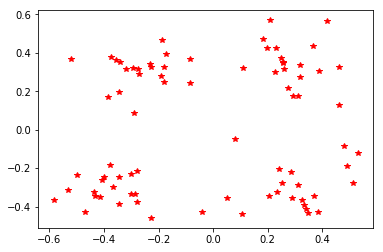

In [187]:
meanDataMat = normalize(dataset)
plotDataset(meanDataMat)

In [188]:
def distance(vectA,vectB):
    Power = np.power((vectA - vectB),2)
    Sum = np.sum(Power,axis = 1)
    return float(np.sqrt(Sum)) 

In [189]:
import random
def kcluster(meanDataMat,k=4):
    row,col = meanDataMat.shape
    print(row,col)
    featureRange = []
    for i in range(col):
        Min = np.min(meanDataMat[:,i])
        Max = np.max(meanDataMat[:,i])
        featureRange.append((Min,Max))
    centerPoints = []  #中心点
    classPoints = []   #聚类数据点
    classLabels = np.mat(np.zeros((row,2)))
    for i in range(k):
        centerPoints.append([random.uniform(r[0],r[1]) for r in featureRange])
        classPoints.append([])
    centerPointsMat = np.mat(centerPoints)
    clusterChanged = True
    while(clusterChanged):
        clusterChanged = False
        for i in range(row):
            minDis = np.inf
            bestK = -1
            for j in range(k):
                dis = distance(meanDataMat[i,:],centerPointsMat[j,:])
                if dis < minDis:
                    minDis = dis
                    bestK = j
            if classLabels[i,0] != bestK:
                clusterChanged = True
            classLabels[i,:] = bestK,minDis
        for center in range(k):
            ptsInClust = meanDataMat[np.nonzero(classLabels[:,0] == center)[0]]  #该步骤需要特别注意，精妙
            centerPointsMat[center,:] = np.mean(ptsInClust,axis=0)
    print('已完成聚类')
    return centerPointsMat,classLabels

In [190]:
centerPointsMat,classLabels = kcluster(meanDataMat)

80 2
已完成聚类


               0          1
count  80.000000  80.000000
mean   -0.008614   0.008614
std     0.331392   0.333145
min    -0.584224  -0.459075
25%    -0.306803  -0.325977
50%     0.005867   0.019362
75%     0.290189   0.323504
max     0.530519   0.568950


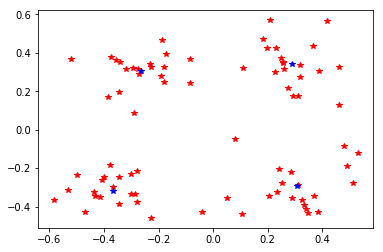

In [191]:
plotDataset(meanDataMat,pointCenter=True,centerPointerMat = centerPointsMat)

# K均值算法的缺点

（1）需要人工预先确定初始值K值，且该值和真实的数据分布未必吻合

（2）K均值只能收敛到局部最优，效果受到初始值的影响

（3）易受噪点和离群点的影响

（4）样本点只能被划分到单一的类中

# K均值聚类算法改进模型

## K-means++算法

K均值的改进算法种，对初始值选择的改进种是很重要的一部分，而这类算法中，最具影响力的当属K-means++算法，原始K均值算法最开始随机的选取K个中心点，而K-means++按照如下的思想选取K个聚类中心：

假设已经选取了n个初始聚类中心（0<n<k），则在选取第n+1个聚类中心时，距离当前n个聚类中心越远的点会有更高的概率被选为第n+1个聚类中心点。聚类中心点当然是相互离的越远越好。当选择完初始点后K-means++后续的执行和经典K均值算法相同

## ISODATA算法

在K均值算法种，聚类个数K的值需要预先认为确定，并且在整个算法过程种无法改变，而当遇到高维度、海量的数据集时，人们往往很难准确地估计出K的大小，ISODATA的全称为迭代自组织数据分析法，就是针对这个问题进行了改进，它的思想很直观，主要通过迭代的方法对分类进行拆分和合并，这需要制定3个阈值：

（1）每个类所要求的最少样本数目$N_min$,如果分裂后会导致某个子类别所包含样本数目小于该阈值，就不会对该类别进行分裂操作

（2）最大方差Sigma,用于控制某个类别中样本的分散程度，当样本的分散程度超过某个阈值时，进行分裂操作

（3）两个聚类中心之间所允许的最小距离$D_min$，如果两个类考的非常近(即这两个类别对应聚类中心之间距离非常小)，小于该阈值时，则对这两个类进行合并操作